<a href="https://colab.research.google.com/github/IshanBhattOfficial/Vizualize-CONV-FeatureExtractors/blob/master/Vizualize_CONV_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to select the perfect CNN Back-bone for Object Detection? - A simple test

In [1]:
# If you have files that are in a format other than .jpg, append those extensions in this list
ALLOWED_EXTENSIONS = [".jpg"]

In [2]:
# OPTIONAL
# Let's make sure we're connected to a GPU-runtime

# If this cell fails due to: 
# "NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running."
# Goto Runtime > Change runtime type and select GPU from the drop-down list against hardware accelerator

# Normally, you should see a Table showing GPU information
!nvidia-smi

Sat Aug  1 13:59:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    14W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#Let's import our dependency packages
import os, sys
import subprocess
import cv2
import numpy as np
import matplotlib.pyplot as plt

#It should be noted that we are not importing anything related to tensorflow in this cell.
# TensorFlow components will be imported immediately before their use.

In [4]:
# Since we're using Convolutional Feature Extractors available in keras.applications; We need to import them as modules
# Only un-comment ONE of the following code-block

# Uncomment below lines if you want to try out VGG-16
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights='imagenet', include_top = False, input_shape=(256, 256, 3))

# # Uncomment below lines if you want to try out MobileNetV2
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# model = MobileNetV2(weights='imagenet', include_top = False, input_shape=(256, 256, 3))

## Uncomment below lines if you want to try out ResNet50
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# model = ResNet50(weights='imagenet', include_top = False, input_shape=(256, 256, 3))


In [5]:
# OPTIONAL
# -> If you don't run this cell, you can directly add some images in a "images" directory inside the pwd

# Now, it is important to have some images to test our model on.
# Let's choose some images from Google, save their URLs and store them in a python dictionary
# It goes without saying that you can add more records in this dict and/or change image names and expect rest of the code to work
IMAGES_DIR = {
    "elephant.jpg" : "https://upload.wikimedia.org/wikipedia/commons/2/22/Elephant_side-view_Kruger.jpg",
    "human.jpg" : "https://cdn.pixabay.com/photo/2015/01/27/09/58/human-613601_960_720.jpg",
    "car.jpg" : "https://upload.wikimedia.org/wikipedia/commons/4/4e/DIG_car.JPG",
    "pcb.jpg" : "https://upload.wikimedia.org/wikipedia/commons/9/97/Spectrum_Analyser_PCB.jpg",
    "forest.jpg" : "https://upload.wikimedia.org/wikipedia/commons/7/77/Latvian_Forest_Tomes_pagasts%2C_%C4%B6eguma_novads%2C_Latvia.jpg"
            }

# Now that we have image urls, Let's download them all into a dir called "images"


# First we create "images" directory if it does not exist
if not (os.path.exists("images")):
  os.mkdir("images")

# we then use wget utility to download the images
for image_name in IMAGES_DIR.keys():
  subprocess.call("cd images && wget -O "+ image_name + " " + IMAGES_DIR[image_name], shell = True)
  

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

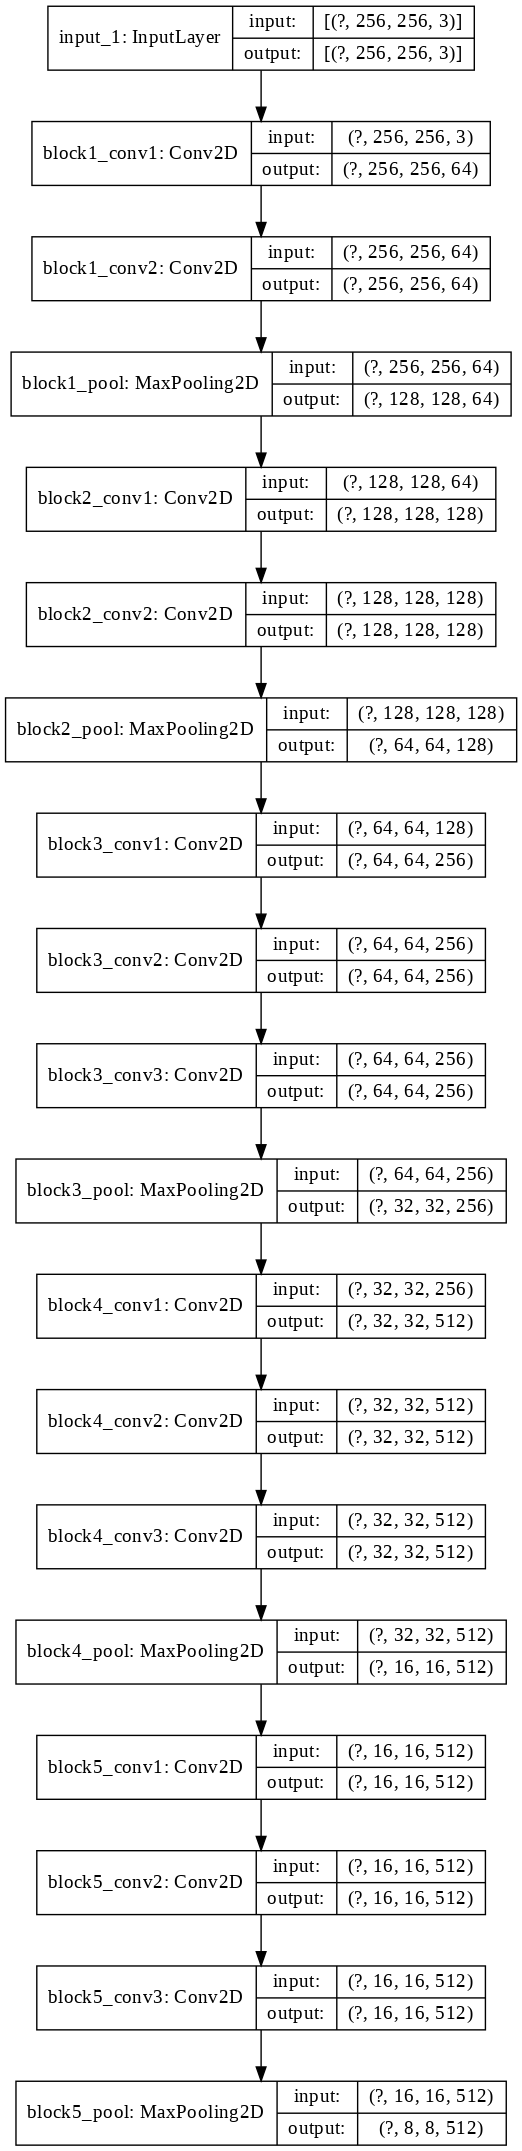

In [6]:
# OPTIONAL
# -> This is useful in case you want to see the architecture of the model.

# Let's inspect the model. Let's save our findings in a dir called "model"


# First we create "model" directory if it does not exist
if not (os.path.exists("model")):
  os.mkdir("model")

# We save model summary in model/summary.txt
with open("model/summary.txt", "w") as f:
  model.summary(print_fn= lambda x: f.write(x + '\n'))
# We print the summary on console as well.
model.summary()

# We use inbuilt function to plot the model, show it on prompt and save it in model/plot.png
from tensorflow.keras.utils import plot_model
plot_model(model, "model/plot.png", True, True, dpi = 100)

Using: elephant.jpg


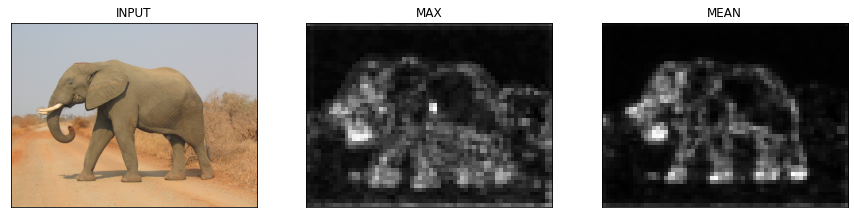

Using: human.jpg


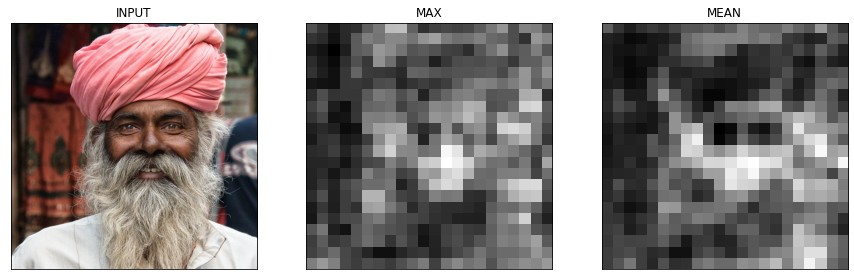

Using: car.jpg


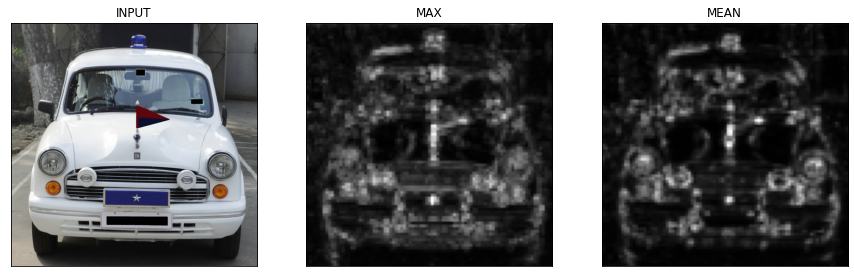

Using: pcb.jpg


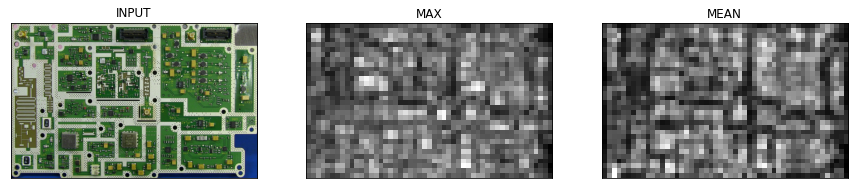

Using: forest.jpg


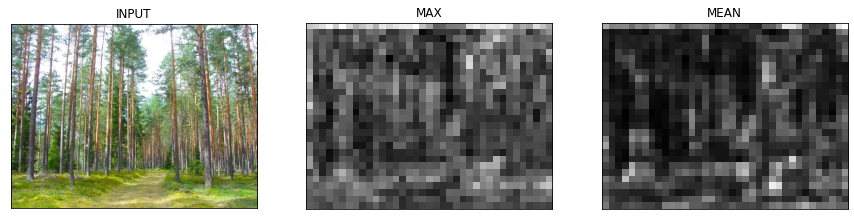

In [7]:
# Now let's test out the model on our selected images
# We will save all our results in a directory called "results"

# First we create "results" directory if it does not exist
if not (os.path.exists("results")):
  os.mkdir("results")

# We traverse through all the files in "images"
for image_name in os.listdir("images"):
  # We process only files that have one of our ALLOWED_EXTENSIONS
  if any([extension in image_name for extension in ALLOWED_EXTENSIONS]):
    
    print("Using:", image_name)
    
    # We do some basic pre-processing with openCV
    temp = cv2.imread(os.path.join("images", image_name))
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp = np.expand_dims(temp, 0)
    img = np.copy(temp)
    
    # We use the specified preprocess_input function before running inference 
    temp = preprocess_input(temp)
    out = model.predict(temp)


    # Once the inference is out, we get the max and average among all the channels
    max_map = np.max(out[0], axis = -1)
    mean_map = np.mean(out[0], axis = -1)

    # Let's plot these figures, save and render them
    plt.figure(figsize= (15, 50))

    # Showing the input image in first column
    ax = plt.subplot(131)
    ax.set_title("INPUT")
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.imshow(img[0])

    # Showing the max_map in second column
    ax = plt.subplot(132)
    ax.set_title("MAX")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(max_map, cmap = "Greys_r")

    # Showing the mean_map in third column
    ax = plt.subplot(133)
    ax.set_title("MEAN")
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.imshow(mean_map, cmap = "Greys_r")

    # Saving results in a results directory
    plt.savefig("results/" +image_name)

    # Render the output on prompt 
    plt.show()

I hope this has helped you!